#Vanilla RNN - Sentiment Analysis - FIFA World Cup 2022 (con GridSearchCV en Colab)

In [8]:
!pip install pandas==2.2.2
!pip install numpy==1.26.4
!pip install matplotlib==3.8.4
!pip install seaborn==0.13.2
!pip install nltk==3.8.1
!pip install keras==3.10.0
!pip install scikeras==0.13.0
!pip install jupyterlab==4.1.5
!pip install notebook==7.1.3
!pip install scikit-learn==1.3.2
!pip install tensorflow==2.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0
ERROR: pip's dependency resolver does not currently take into account all

In [1]:
import pandas as pd
from google.colab import files
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout


## 1. Subir y cargar el CSV




In [2]:
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)
df.head()


Saving fifa_tweets_clean.csv to fifa_tweets_clean.csv


,Tweet,Sentiment,test_clean,processed_tokens,sentiment_label
0,What are we drinking today @TucanTribe \r\n@Ma...,neutral,what are we drinking today _mention_tucantribe...,"['drinking', 'today', '_mention_tucantribe_', ...",1
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,amazing _mention_canadasocceren_ _hashtag_worl...,"['amazing', '_mention_canadasocceren_', '_hash...",2
2,Worth reading while watching #WorldCup2022 htt...,positive,worth reading while watching _hashtag_worldcup...,"['worth', 'reading', 'watching', '_hashtag_wor...",2
3,Golden Maknae shinning bright\r\n\r\nhttps://t...,positive,golden maknae shinning bright _hashtag_jeonjun...,"['golden', 'maknae', 'shinning', 'bright', '_h...",2
4,"If the BBC cares so much about human rights, h...",negative,if the bbc cares so much about human rights ho...,"['bbc', 'cares', 'much', 'human', 'rights', 'h...",0


## 2. Preprocesamiento

In [3]:
texts = df["processed_tokens"].apply(lambda tokens: " ".join(eval(tokens)))
labels = df["sentiment_label"]

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


## 3. Definir el modelo RNN

In [4]:
def customRNN(input_shape, units=64, dropout=0.5, **kwargs):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=input_shape[0]))
    model.add(SimpleRNN(units=units, dropout=dropout))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.add(Dropout(0.5))

    model.build(input_shape=(None, input_shape[0]))
    return model


## 4. GridSearchCV

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

rnn_clf = KerasClassifier(
    model=customRNN,
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
    model__input_shape=(100,),
    batch_size=32,
    epochs=10,
    callbacks=[early_stop],
    validation_split=0.1,
    verbose=0
)


param_grid = {
    "model__units": [32, 64, 128],
    "model__dropout": [0.3, 0.5],
    "optimizer": ["adam", "rmsprop"],
    "batch_size": [32,64],
    "epochs": [5,10]
}

grid_rnn = GridSearchCV(
    estimator=rnn_clf,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    error_score='raise'
)

grid_rnn.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=32, optimizer=adam; total time=  31.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=32, optimizer=adam; total time=  28.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=32, optimizer=adam; total time=  32.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  31.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  55.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  30.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=64, optimizer=adam; total time=  46.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=64, optimizer=adam; total time=  43.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=64, optimizer=adam; total time=  50.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  34.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  33.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  54.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=128, optimizer=adam; total time=  45.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=128, optimizer=adam; total time=  50.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=128, optimizer=adam; total time=  57.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  49.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time= 1.5min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=32, optimizer=adam; total time=  49.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=32, optimizer=adam; total time=  45.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=32, optimizer=adam; total time=  36.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  50.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  41.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  48.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=64, optimizer=adam; total time=  33.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=64, optimizer=adam; total time=  48.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=64, optimizer=adam; total time=  48.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  33.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  50.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  42.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=128, optimizer=adam; total time= 1.8min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=128, optimizer=adam; total time= 1.8min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=128, optimizer=adam; total time=  53.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time= 1.6min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  56.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=5, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=32, optimizer=adam; total time=  44.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=32, optimizer=adam; total time=  32.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=32, optimizer=adam; total time=  40.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  41.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  32.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  27.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=64, optimizer=adam; total time=  31.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=64, optimizer=adam; total time=  51.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=64, optimizer=adam; total time=  58.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  51.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  43.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  58.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=128, optimizer=adam; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=128, optimizer=adam; total time=  56.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=128, optimizer=adam; total time=  45.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  59.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  56.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=32, optimizer=adam; total time=  37.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=32, optimizer=adam; total time=  48.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=32, optimizer=adam; total time=  42.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  53.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  34.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  38.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=64, optimizer=adam; total time=  52.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=64, optimizer=adam; total time=  54.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=64, optimizer=adam; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  31.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  31.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  55.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=128, optimizer=adam; total time= 1.8min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=128, optimizer=adam; total time= 1.3min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=128, optimizer=adam; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time= 1.6min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=32, epochs=10, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  48.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=32, optimizer=adam; total time=  32.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=32, optimizer=adam; total time=  27.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=32, optimizer=adam; total time=  22.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  33.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  33.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  17.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=64, optimizer=adam; total time=  39.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=64, optimizer=adam; total time=  43.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=64, optimizer=adam; total time=  20.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  39.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  24.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  23.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=128, optimizer=adam; total time=  47.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=128, optimizer=adam; total time=  52.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=128, optimizer=adam; total time=  25.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  33.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  32.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  44.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=32, optimizer=adam; total time=  17.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=32, optimizer=adam; total time=  27.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=32, optimizer=adam; total time=  17.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  18.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  28.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  32.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=64, optimizer=adam; total time=  43.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=64, optimizer=adam; total time=  28.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=64, optimizer=adam; total time=  27.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  29.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  18.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  23.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=128, optimizer=adam; total time=  31.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=128, optimizer=adam; total time=  33.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=128, optimizer=adam; total time=  32.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  43.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  45.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=5, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  50.6s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=32, optimizer=adam; total time=  19.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=32, optimizer=adam; total time=  33.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=32, optimizer=adam; total time=  31.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  27.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  28.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=32, optimizer=rmsprop; total time=  18.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=64, optimizer=adam; total time=  23.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=64, optimizer=adam; total time=  18.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=64, optimizer=adam; total time=  23.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  33.1s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  40.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=64, optimizer=rmsprop; total time=  28.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=128, optimizer=adam; total time=  54.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=128, optimizer=adam; total time= 1.4min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=128, optimizer=adam; total time=  28.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  30.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  45.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.3, model__units=128, optimizer=rmsprop; total time=  43.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=32, optimizer=adam; total time=  21.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=32, optimizer=adam; total time=  19.4s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=32, optimizer=adam; total time=  22.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  22.5s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  27.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=32, optimizer=rmsprop; total time=  21.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=64, optimizer=adam; total time=  60.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=64, optimizer=adam; total time=  19.2s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=64, optimizer=adam; total time= 1.1min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  23.3s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  17.9s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=64, optimizer=rmsprop; total time=  30.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=128, optimizer=adam; total time= 1.0min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=128, optimizer=adam; total time= 1.0min


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=128, optimizer=adam; total time=  42.0s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  34.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  29.7s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[CV] END batch_size=64, epochs=10, model__dropout=0.5, model__units=128, optimizer=rmsprop; total time=  51.8s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


GridSearchCV(cv=3, error_score='raise',
             estimator=KerasClassifier(batch_size=32, callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x78ed27dcd2d0>], epochs=10, loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function customRNN at 0x78ed27aa6f20>, model__input_shape=(100,), optimizer='adam', validation_split=0.1, verbose=0),
             param_grid={'batch_size': [32, 64], 'epochs': [5, 10],
                         'model__dropout': [0.3, 0.5],
                         'model__units': [32, 64, 128],
                         'optimizer': ['adam', 'rmsprop']},
             verbose=2)

## Evaluación del modelo

In [2]:
print("Mejores parámetros:", grid_rnn.best_params_)

y_pred = grid_rnn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("F1-score:", f1_score(y_test, y_pred, average="macro"))
print("Kappa:", cohen_kappa_score(y_test, y_pred))


Mejores parámetros: {'batch_size': 32, 'epochs': 10, 'model__dropout': 0.5, 'model__units': 128, 'optimizer': 'rmsprop'}
Accuracy: 0.7258157602663707
Precision: 0.72
Recall: 0.71
F1-score: 0.715
Kappa: 0.68


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy:  0.4978 - loss: 0.9621 - val_accuracy: 0.7314 - val_loss: 0.6203
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7611 - loss:  0.5659 - val_accuracy: 0.7525 - val_loss: 0.5704
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8985  - loss: 0.2747 - val_accuracy: 0.7630 - val_loss: 0.7421
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9189 - loss: 0.2180 - val_accuracy: 0.7497 - val_loss: 0.8568
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9374 - loss: 0.1705 - val_accuracy: 0.7481 - val_loss: 0.9507
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9582 - loss: 0.1158 - val_accuracy: 0.7453 - val_loss: 1.1715
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9607 - loss: 0.1020 - val_accuracy: 0.7569 - val_loss: 1.2367
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9710 - loss: 0.0780 - val_a

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy: 0.7258   Precision: 0.72
Recall:   0.71   F1-score:  0.715   Kappa: 0.68

              precision    recall  f1-score   support

    negative       0.67      0.80      0.72      1157
     neutral       0.72      0.65      0.68      1650
    positive       0.79      0.77      0.78      1698

    accuracy                           0.72      4505
   macro avg       0.72      0.73      0.72      4505
weighted avg       0.72      0.72      0.72      4505



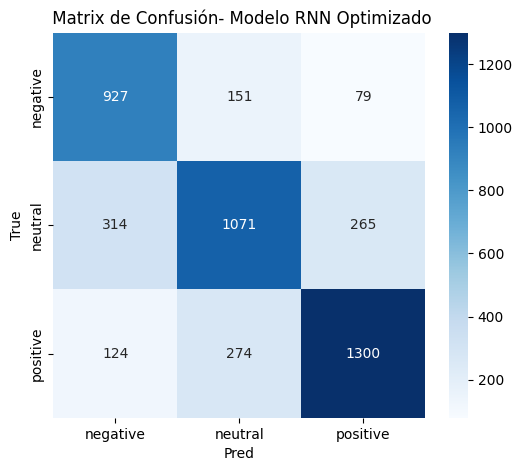

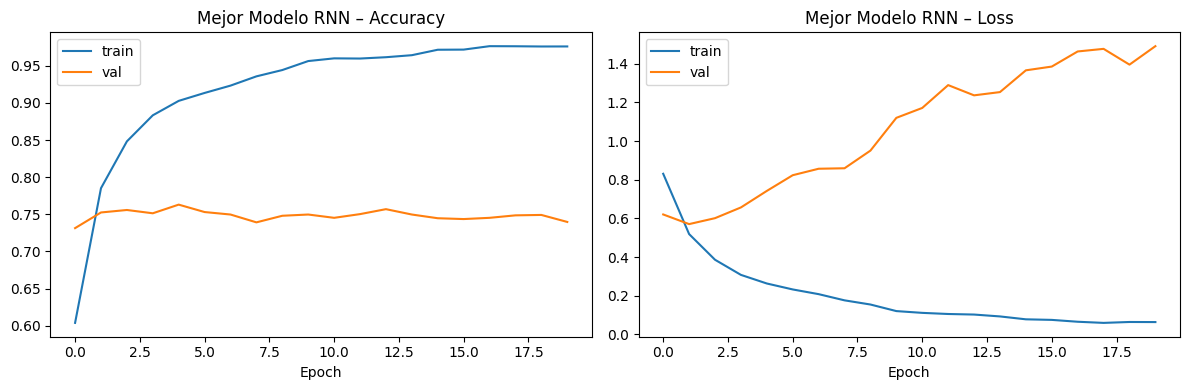

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, target_names, title):
    """
    Dibuja la matriz de confusión con anotaciones.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Matriz de Confusión - {title}")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Real")
    plt.tight_layout()
    plt.show()
best_params = grid_rnn.best_params_
best_model = customRNN(input_shape=(100,),
                       units=best_params['model__units'],
                       dropout=best_params['model__dropout'])

best_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer=best_params['optimizer'],
                   metrics=["accuracy"])

history = best_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    callbacks=[early_stop],
    verbose=1
)

def plot_history(history, title):
    """
    Grafica accuracy y loss para entrenamiento y validación.
    """
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history.get('val_accuracy', []), label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history.get('val_loss', []), label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


target_names = ["negative", "neutral", "positive"]  # Ajusta si usas otro orden

plot_confusion_matrix(y_test, y_pred, target_names, "Modelo RNN Optimizado")

plot_history(history, "Mejor Modelo RNN (reentrenado)")